# Исследование объявлений о продаже квартир

### Описание проекта 


У нас есть данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Определим рыночную стоимость объектов недвижимости. Построим автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

***Импортируем библиотеки***


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Предобработка данных

Для начала изучим датасет, определим и посмотрим на пропущенные значения. Наверняка там есть и пропуски, и аномалии. Заполним пропуски, где это уместно и объясним, откуда они могут взяться

In [2]:
df = pd.read_csv(r'D:\Проекты яндекс-практикума\real_estate_data.csv', sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#посмотрим на описание значений в каждом столбце
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
#посмотрим и оценим пропуски в данных 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посчитаем эти пропуски в % - их довольно много. Вероятно они обеспечены человеческим фактором: люди при заполнении данных могут пропускать значения. Например, если у них в квартире нет балкона- они просто не заполнят эту графу

In [5]:
df.isnull().sum().sort_values()/df.shape[0]*100 #посмотрим пропуски в %, чтобы оценить какие пропуски нам критичны

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

Пропусков довольно много. Будем разбираться, какие можно заполнить, а какие лучше не трогать, чтобы не исказить данные

1. total_images 23699 non-null int64 ---> корректный столбец (можно удалить за ненадобностью.)
2. last_price 23699 non-null float64 ---> корректный столбец
3. total_area 23699 non-null float64 ---> корректный столбец
4. first_day_exposition 23699 non-null object --->  корректный столбец , поменять тип
5. rooms 23699 non-null int64 --->  корректный столбец
6. ceiling_height 14504 non-null float64 --->  очень много пропусков, надо будет заполнить (наиболее распространненным значением(ми)), поменяем тип на int (возможно)
7. floors_total 23613 non-null float64 --->  пропусков мало, нужен анализ совместно со столбцом floor, поменяем тип на int
8. living_area 21796 non-null float64 ---> 8% пропусков - довольно много, надо проанализировать
9. floor 23699 non-null int64 --->  корректный столбец
10. is_apartment 2775 non-null object --->  много пропусков. Проверим пропуски скорее всего это "не аппартаменты" и заполним "0"(их 88% ). Поменяем тип на bool, Кстати он не нужен для выполнения задачи - можно и удалить.
11. studio 23699 non-null bool ---> корректный столбец ( не нужен)
12. open_plan 23699 non-null bool --->  корректный столбец ( не нужен)
13. kitchen_area 21421 non-null float64 --->  9% пропусков - довольно много, надо проанализировать
14. balcony 12180 non-null float64 ---> проанализируем и скорее всего заплним пропуски "0". И забудем про этот столбец, так как он не нужен для выполнения задачи.
15. locality_name 23650 non-null object --->  пропусков мало (около 0,2%), проанализируем.
16. airports_nearest 18157 non-null float64 ---> оставить как есть. Поменяем тип на int
17. cityCenters_nearest 18180 non-n ull float64 ---> 23,3% пропусков - много. Нужен анализ 
18. parks_around3000 18181 non-null float64 ---> оставим как есть. Поменяем тип на int
19. parks_nearest 8079 non-null float64 ---> оставим как есть. Поменяем тип на int
20. ponds_around3000 18181 non-null float64 --->  оставимь как есть. Поменяем тип на int
21. ponds_nearest 9110 non-null float64 ---> оставим как есть. Поменяем тип на int
22. days_exposition 20518 non-null float64 ---> 13,4% пропусков - много. Нужен анализ и потом заполнить. Изменим тип на int

***Столбец balcony***

In [6]:
#считаем, в скольких строках нет балконов
df['balcony'].isna().sum()

11519

In [7]:
#там, где не заполнено кол-во балконов-заполняем нулями 
df['balcony'] = df['balcony'].fillna(0) 

In [8]:
df['balcony'] = df['balcony'].astype(int)

In [9]:
df['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

***Вывод: С балконами теперь полный порядок - есть квартиры с 5 балконами,и есть совсем без них***



***Столбец last_price***

In [10]:
df['last_price'] = df['last_price'].astype(int) #

In [11]:
#посмотрим на значения столбца
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

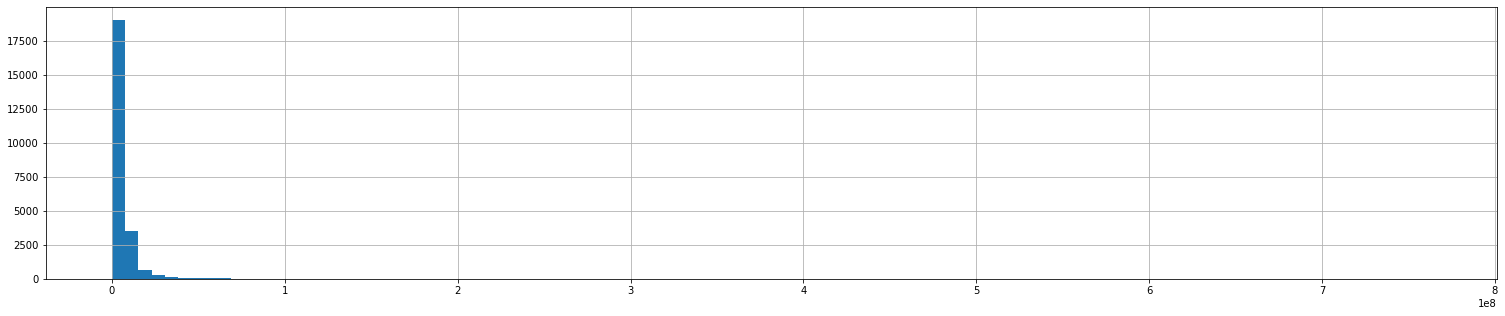

In [12]:
df['last_price'].hist(figsize=(26,5), bins=100)

Тип поменяли. Есть как сильно большие (763млн) так очень маленькие значения (12190р). Разберемся. Рассмотрим всё на графиках.

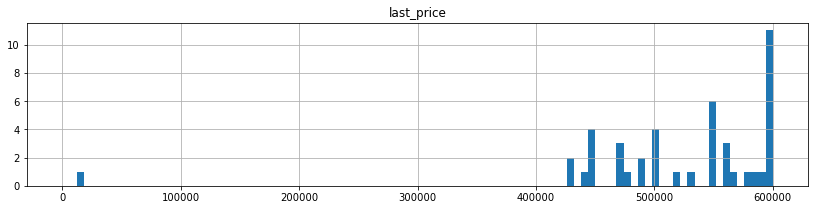

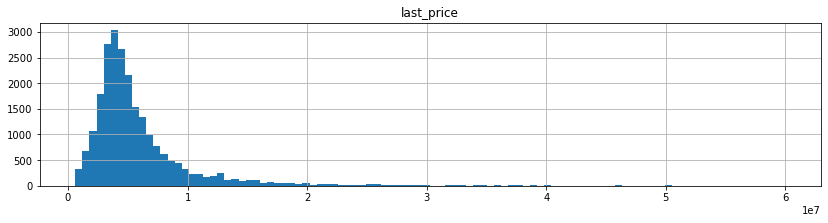

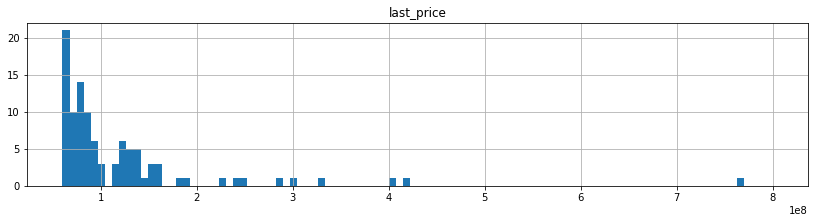

In [13]:
df.hist('last_price', bins=100, figsize=(14,3), range=(0, 600001));
df.hist('last_price', bins=100, figsize=(14,3), range=(600000, 60000001));
df.hist('last_price', bins=100, figsize=(14,3), range=(60000000, 800000000));

 Есть выбросы. Избавимся от них, чтобы данные были более равномерные (хотя можно и оставить их совсем мало, влияние будет незначительным). Оставим все что >450тыс.руб и <150млн.р., остальное удалим

In [14]:
df = df.loc[(df['last_price']>450000) & (df['last_price']<150000000)]

print(df['last_price'].describe())

count    2.367400e+04
mean     6.357255e+06
std      7.350857e+06
min      4.700000e+05
25%      3.401250e+06
50%      4.650000e+06
75%      6.790000e+06
max      1.480000e+08
Name: last_price, dtype: float64


In [15]:
display(df.query('450000 > last_price and last_price < 150000000'))
display(df.head())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


***Вывод: удалили выбросы -это строчки с ценой <450 тыс и >1,5 млн***

***Столбец total_area***

In [16]:
#смотрим данные -вроде все ок (12 м -это тоже ок, может быть маленькие апарты)
df['total_area'].describe()

count    23674.000000
mean        60.129943
std         34.364530
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        631.200000
Name: total_area, dtype: float64

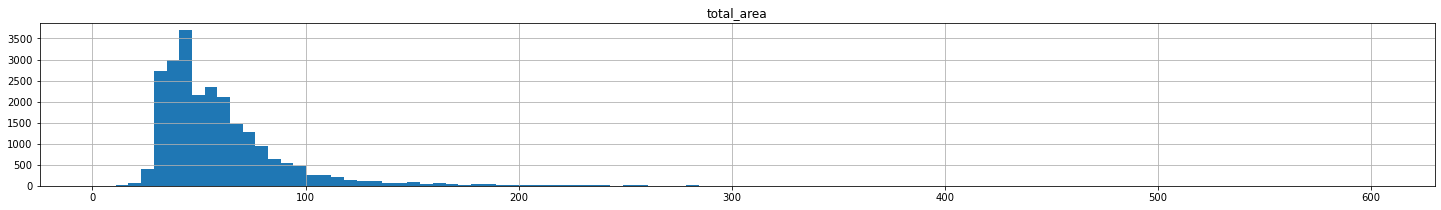

In [17]:
df.hist('total_area', bins=100, figsize=(25,3), range=(5, 600));

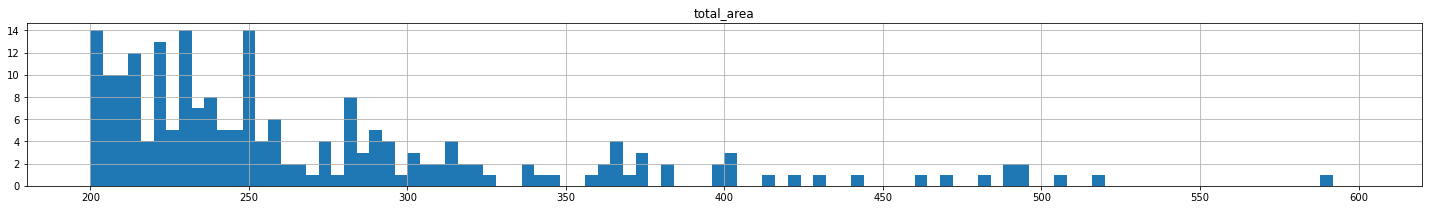

In [18]:
#посморим большие площади
df.hist('total_area', bins=100, figsize=(25,3), range=(200, 600));

***Вывод- все ок, выбросов нет, все равномерно***

***Стобец rooms***

In [19]:
df['rooms'].value_counts()



1     8044
2     7934
3     5812
4     1177
5      323
0      197
6      102
7       57
8       10
9        8
10       3
11       2
14       2
15       1
19       1
16       1
Name: rooms, dtype: int64

In [20]:
df['rooms'].describe()

count    23674.000000
mean         2.068261
std          1.072966
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Выбросы есть- 19 комнат-это слишком)
медиана-2, это тоже об этом говорит. Уберем выбросы

In [21]:
df.query('rooms == 0')['total_area'].describe()

count    197.000000
mean      29.279746
std       25.855264
min       15.500000
25%       24.050000
50%       26.050000
75%       28.400000
max      371.000000
Name: total_area, dtype: float64

Есть 197 значений с 0 комнатами))) что за ерунда) вопрос-убирать или нет это... пока оставим все как есть, может люди случайно ошиблись... или ошибка выгрузки

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

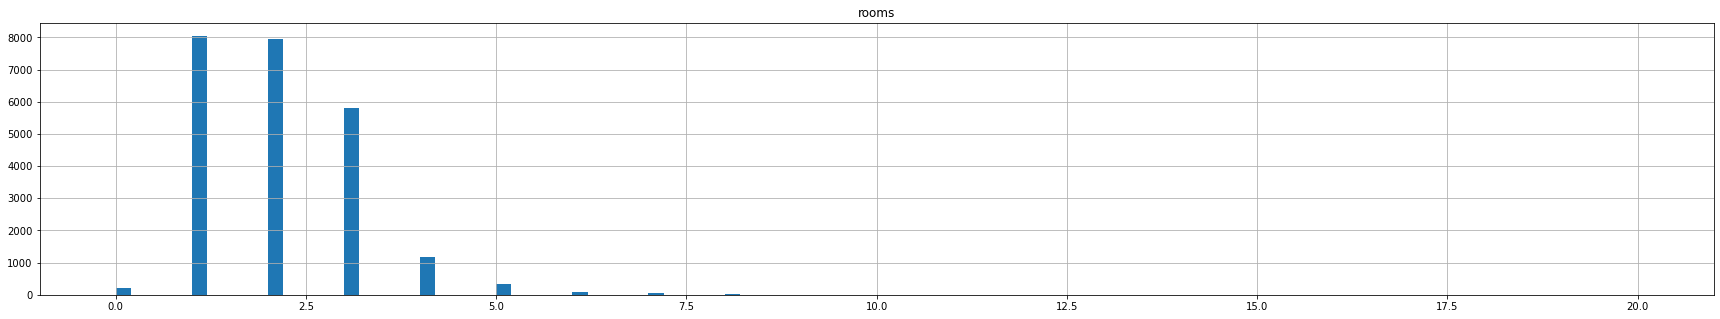

In [22]:
df.hist('rooms', bins=100, figsize=(30,5), range=(0, 20))

Text(0.5, 1.0, 'Boxplot для количества комнат')

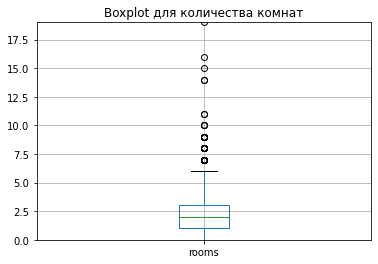

In [23]:
plt.ylim(0, 19)
df.boxplot('rooms')
plt.title('Boxplot для количества комнат', fontsize=12)

Принимаем волевое решение удалить из датасета выбросы)

In [24]:
df = df.query('1<= rooms < 7')

In [25]:
df['rooms'].isna().sum()

0

In [26]:
df['rooms'].describe()

count    23392.000000
mean         2.064082
std          0.991756
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

***Вывод: Все значения - адекватны) Пропусков нет***

***Столбец locality_name***

In [27]:
#смотрим уникальные значения/названия городов
df['locality_name'].unique() 

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [28]:
len(df['locality_name'].unique()) # кол-во городов 

362

In [29]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург      15511
посёлок Мурино         495
посёлок Шушары         436
Всеволожск             392
Пушкин                 368
Колпино                337
посёлок Парголово      322
Гатчина                307
деревня Кудрово        283
Выборг                 237
Name: locality_name, dtype: int64

In [30]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True) #заменяем "ё" на "е" 

In [31]:
#заменили ё на е и соответственно убрали дубли
len(df['locality_name'].unique()) 

328

In [32]:
#смотрим, есть ли строки без городов -да, как выяснилось! их 49 
df['locality_name'].isna().sum() 

49

In [33]:
#удаляем строки без городов -они портят всю картину, они непонятно где находятся
df = df.dropna(subset=['locality_name']) 

***Вывод: С городами разобрались, надеюсь***


***Столбцы is_apartment, studio, open_plan***

In [34]:
#смотрим уникальные значения - есть nan, надо заменить
df['is_apartment'].unique() 

array([nan, False, True], dtype=object)

In [35]:
#там, где не заполнено -заполняем нулями (значит люди пропустили этот пункт потому что у них не апарты)
df['is_apartment'] = df['is_apartment'].fillna(0) 

In [36]:
df['is_apartment'] = df['is_apartment'].map({True: 1, False: 0}) #переведем в цифровой вид

In [37]:
df['is_apartment'].value_counts().sort_values() #проверяем-все ок. 

1       49
0    23294
Name: is_apartment, dtype: int64

In [38]:
#смотрим уникальное значение студии-все ок
df['studio'].unique() 

array([False,  True])

In [39]:
#переведем в цифровой вид
df['studio'] = df['studio'].map({True: 1, False: 0})

In [40]:
#проверяем-все ок.
df['studio'].value_counts().sort_values() 

1       11
0    23332
Name: studio, dtype: int64

In [41]:
df['open_plan'].unique() 

array([False,  True])

In [42]:
#переведем в цифровой вид
df['open_plan'] = df['open_plan'].map({True: 1, False: 0}) 

***Вывод: С апартаментами, студиями и свободной планировкой разобрались и привели в должный вид (хотя эти столбцы нам не понадобятся), поменяли на int, заполнили пропуски***

***Столбец first_day_exposition***

In [43]:
#приведем в соответствие first_day_exposition
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S") 

In [44]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,0,...,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,0,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,0,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [45]:
#разбиваем по столбцам дату
 
df['week_day'] =df['first_day_exposition'].dt.weekday

df['month'] = df['first_day_exposition'].dt.month

df['year'] = df['first_day_exposition'].dt.year

In [46]:
#проверяем, все ли столбцы на месте
df[['first_day_exposition', 'week_day', 'month','year']].head() 

,first_day_exposition,week_day,month,year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


***Вывод: заменили формат даты, получили три столбца - week_day, month, year. Они помогут нам в дальнейшем***

***Столбец  ceiling_height***

In [47]:
# смотрим что с потолками
df['ceiling_height'].sort_values()

22590    1.00
5712     1.20
16934    1.75
11352    2.00
19098    2.00
         ... 
23687     NaN
23690     NaN
23692     NaN
23695     NaN
23696     NaN
Name: ceiling_height, Length: 23343, dtype: float64

Есть nan

In [48]:
df['ceiling_height'].describe() #есть необоснованно большие и маленькие значения, пока оставим их как есть,
#медиана от среднего отличается не сильно из-за этих выбросов во всей выборке

count    14334.000000
mean         2.766301
std          1.250710
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

есть 100 метровые потолки, будем с этим что-то делать

<AxesSubplot:>

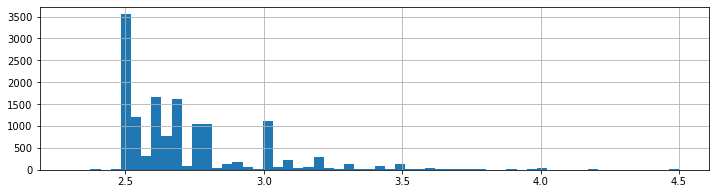

In [49]:
df['ceiling_height'].hist(figsize=(12,3), bins=60, range=(2.3, 4.5))


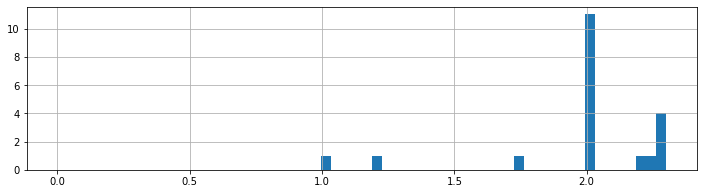

In [50]:
df['ceiling_height'].hist(figsize=(12,3), bins=60, range=(0,2.3));

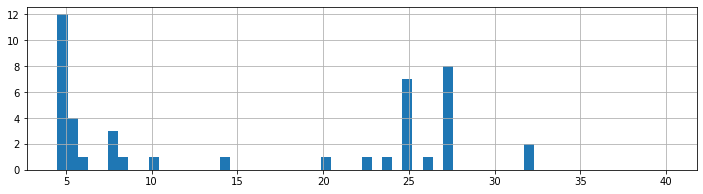

In [51]:
df['ceiling_height'].hist(figsize=(12,3), bins=60, range=(4.5,40));

Проверим одну гипотезу: что если люди забыли поставить запятую...

In [52]:
df.query('ceiling_height > 22 and ceiling_height < 42')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,week_day,month,year
355,17,3600000,55.2,2018-07-12,2,25.0,5.0,32.0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,259.0,3,7,2018
3148,14,2900000,75.0,2018-11-12,3,32.0,3.0,53.0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,11,2018
4643,0,4300000,45.0,2018-02-01,2,25.0,9.0,30.0,2,0,...,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0,3,2,2018
5076,0,3850000,30.5,2018-10-03,1,24.0,5.0,19.5,1,1,...,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0,2,10,2018
5246,0,2500000,54.0,2017-10-13,2,27.0,5.0,30.0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,540.0,4,10,2017
5669,4,4400000,50.0,2017-08-08,2,26.0,9.0,21.3,3,0,...,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0,1,8,2017
5807,17,8150000,80.0,2019-01-09,2,27.0,36.0,41.0,13,0,...,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,2,1,2019
6246,6,3300000,44.4,2019-03-25,2,25.0,5.0,31.3,5,0,...,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN,0,3,2019
9379,5,3950000,42.0,2017-03-26,3,25.0,5.0,30.0,2,0,...,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN,6,3,2017
10773,8,3800000,58.0,2017-10-13,2,27.0,10.0,30.1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,71.0,4,10,2017


21 строчка. Возму на себя смелость поставить запятую - т.е разделим на 10

In [53]:
ceiling_height_list= df.query('ceiling_height > 22 and ceiling_height < 42').index # Список индексов для проверки
df.loc[ceiling_height_list, 'ceiling_height'] = df.loc[ceiling_height_list, 'ceiling_height'] / 10

In [54]:
df.loc[ceiling_height_list]['ceiling_height']
df['ceiling_height'].tail(10)

23689    2.86
23690     NaN
23691    2.75
23692     NaN
23693    2.60
23694    3.70
23695     NaN
23696     NaN
23697    3.00
23698    2.50
Name: ceiling_height, dtype: float64

Удалим строки где некорректные значения:

выше 42 (там только 100 -нереально, 10 тоже не реально )
ниже 2.2 
от 7 до 22 (выбиваются)

In [55]:
ceiling_height_list = df.query('ceiling_height>42 or ceiling_height<2.2 or 7<ceiling_height<22').index
df.loc[ceiling_height_list, 'ceiling_height']

552        2.00
2572       2.00
3474       8.00
4212       2.00
5712       1.20
5850       2.00
5863       8.30
11352      2.00
15061     14.00
15743      8.00
16446      2.00
16884      2.00
16934      1.75
17442      8.00
17496     20.00
19098      2.00
19329      2.00
20520      2.00
22309     10.30
22590      1.00
22869    100.00
22960      2.00
Name: ceiling_height, dtype: float64

In [56]:
#смотрим сколько строк у нас останется после удаления
print("Кол-во строк перед удалением", len(df))
df.drop(ceiling_height_list, inplace=True, axis=0)
print("Кол-во строк после удаления", len(df))

df.reset_index(inplace=True, drop=True)
display(df.tail())

Кол-во строк перед удалением 23343
Кол-во строк после удаления 23321


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,week_day,month,year
23316,9,9700000,133.81,2017-03-21,3,3.7,5.0,73.3,3,0,...,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,1,3,2017
23317,14,3100000,59.00,2018-01-15,3,NaN,5.0,38.0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,45.0,0,1,2018
23318,18,2500000,56.70,2018-02-11,2,NaN,3.0,29.7,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2,2018
23319,13,11475000,76.75,2017-03-28,2,3.0,17.0,NaN,12,0,...,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,1,3,2017
23320,4,1350000,32.30,2017-07-21,1,2.5,5.0,12.3,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,7,2017


In [57]:
#проверяем данные
df['ceiling_height'].describe() 

count    14312.000000
mean         2.723192
std          0.272027
min          2.200000
25%          2.500000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

Удалились выбросы и аномалии - теперь все в пределах нормы. Теперь займемся nan-ами -заполним пропуски медианой, она равна 265

In [58]:
df['ceiling_height'] = df['ceiling_height'].fillna(265)

In [59]:
# Проверяем
df['ceiling_height'].isna().sum()

0

Пропусков -0!!

Text(0.5, 1.0, 'Boxplot для высоты потолков')

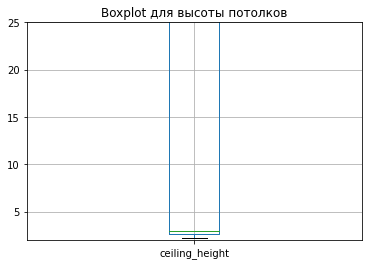

In [60]:
plt.ylim(2, 25)
df.boxplot('ceiling_height')
plt.title('Boxplot для высоты потолков', fontsize=12)

***Вывод: мы убрали выбросы и заполнили пропуски медианой. Теперь потолки в норме)***

***Столбец floors_total***

In [61]:
df['floors_total'].value_counts()
df['floors_total'].describe()

count    23239.000000
mean        10.646241
std          6.569236
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

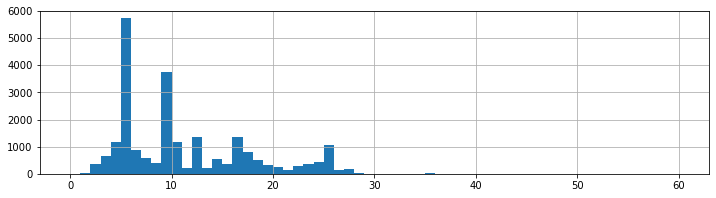

In [62]:
df['floors_total'].hist(figsize=(12,3), bins=60, range=(0,60));

<AxesSubplot:>

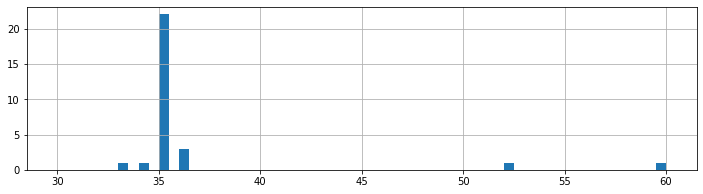

In [63]:
# смотрим этажи 30-60
df['floors_total'].hist(figsize=(12,3), bins=60, range=(30,60))

В принципе все ок, 37 еще может быть этаж. А остальное единичные выбросы
Заполним пропуски медианой

In [64]:
df['floors_total'] = df['floors_total'].fillna(9)

In [65]:
# Проверяем
df['floors_total'].isna().sum()

0

***Вывод: с кол-вом этажей в доме разобрались. Пропуски возникали наверное потому, что при продаже квартир люди считали кол-во этажей в доме неважным фактором, поэтому пропускали этот пункт.***

***Столбец "living_area" и Столбец "kitchen_area"***

In [66]:
df['living_area'].describe()


count    21451.000000
mean        33.994457
std         19.690501
min          2.000000
25%         18.700000
50%         30.000000
75%         42.200000
max        301.500000
Name: living_area, dtype: float64

Что странного: встречаются площади 2 кв м.

In [67]:
df['kitchen_area'].describe()

count    21268.000000
mean        10.502888
std          5.718535
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

С кухнями тоже 1,3 кв м -крайне мало

In [68]:
df['living_area'].isna().sum()

1870

In [69]:
df['kitchen_area'].isna().sum()

2053

Пропусков  многовато

<AxesSubplot:>

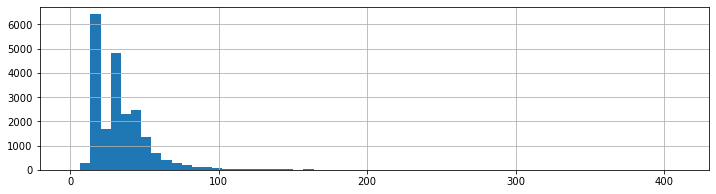

In [70]:
df['living_area'].hist(figsize=(12,3), bins=60, range=(0,410))

<AxesSubplot:>

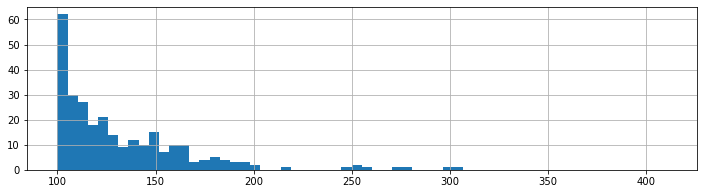

In [71]:
df['living_area'].hist(figsize=(12,3), bins=60, range=(100,410))

<AxesSubplot:>

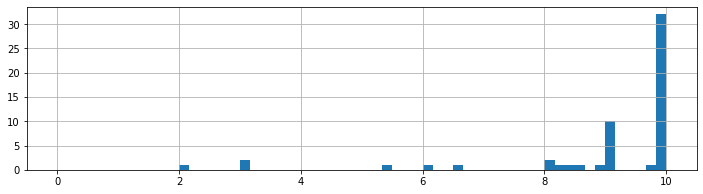

In [72]:
df['living_area'].hist(figsize=(12,3), bins=60, range=(0,10))

Есть аномально маленькие площади. 

 посмотрю на Boxplot

Text(0.5, 1.0, 'Boxplot для площади кухни')

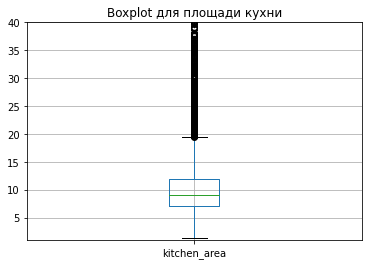

In [73]:
plt.ylim(1, 40)
df.boxplot('kitchen_area')
plt.title('Boxplot для площади кухни', fontsize=12)

Text(0.5, 1.0, 'Boxplot для жилой площади')

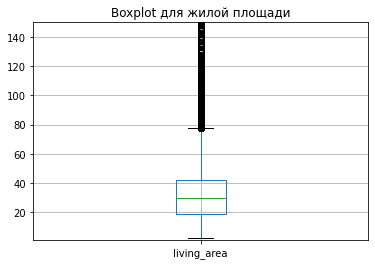

In [74]:
plt.ylim(1, 150)
df.boxplot('living_area')
plt.title('Boxplot для жилой площади', fontsize=12)

Обрежем усы. Но все же не будем выкидывать много значений из датасета. 
Площадь кухни возьмем от 2 до 18 кв м
Площадь кв от 12 до 190
Пусть будет так. Это разумно, в рамках разброса

In [75]:
df = df.query('2< kitchen_area < 18')
df = df.query('12< living_area < 190')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19343 entries, 1 to 23320
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19343 non-null  int64         
 1   last_price            19343 non-null  int32         
 2   total_area            19343 non-null  float64       
 3   first_day_exposition  19343 non-null  datetime64[ns]
 4   rooms                 19343 non-null  int64         
 5   ceiling_height        19343 non-null  float64       
 6   floors_total          19343 non-null  float64       
 7   living_area           19343 non-null  float64       
 8   floor                 19343 non-null  int64         
 9   is_apartment          19343 non-null  int64         
 10  studio                19343 non-null  int64         
 11  open_plan             19343 non-null  int64         
 12  kitchen_area          19343 non-null  float64       
 13  balcony         

In [76]:
df['living_area'].isna().sum()

0

In [77]:
df['kitchen_area'].isna().sum()

0

***Вывод: Датасет в части площадь кухонь и жилую площадь почистили от аномалий. Пропусков не осталось)***

***Итак, что имеем после предобработки***
- 1) Имели пропуски в столбце с балконами. Скорее всего, люди с кв. без балконов просто их не указали - поэтому заменяем пропуски на 0.
- 2) Имели строки с отсутствием города. Удалили эти строки- квартиры без привязки к населенному пункту искажают информацию
- 3) Также заменили Ё на Е в названии городов -убрали дубликаты. 
- 4) Имели пропуски в стобце с апартаментами - заменили на 0. Скорее всего пропуски в данном столбце говорят о том, что такой объект- не апартаменты.
- 5) Меняем тип данных в стобцах is_apartment, open_plan, studio - на числовое (int). Так будет нагляднее и удобнее
- 6) Преобразуем first_day_exposition в три стобца: день, месяц, год. Для удобства
- 7) Имеем пропуски в:


airports_nearest, cityCenters_nearest, parks_around3000, ponds_nearest, days_exposition - тут тоже пропуски. Заполнять чем -неизвестно. Оставим пока как есть

И в конце переставим столбцы местами: наверное так будет визуально удобнее

In [78]:
df = df[[
 'locality_name', 
 'rooms',
 'total_area',
 'living_area',
 'kitchen_area',
 'ceiling_height',
 'balcony',
 'floor',
 'floors_total', 
 'last_price',
 'is_apartment',
 'studio',
 'open_plan',  
 'total_images',
 'days_exposition',       
 'week_day',        
 'month',
 'year',
 'airports_nearest',       
 'cityCenters_nearest',       
 'parks_around3000',       
 'parks_nearest',       
 'ponds_around3000',       
 'ponds_nearest'
]]

In [79]:
df.head() #проверка

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,last_price,...,days_exposition,week_day,month,year,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
1,поселок Шушары,1,40.40,18.60,11.00,265.0,2,1,11.0,3350000,...,81.0,1,12,2018,12817.0,18603.0,0.0,NaN,0.0,NaN
2,Санкт-Петербург,2,56.00,34.30,8.30,265.0,0,4,5.0,5196000,...,558.0,3,8,2015,21741.0,13933.0,1.0,90.0,2.0,574.0
5,городской поселок Янино-1,1,30.40,14.40,9.10,265.0,0,5,12.0,2890000,...,55.0,0,9,2018,NaN,NaN,NaN,NaN,NaN,NaN
8,поселок Мурино,1,33.16,15.43,8.81,265.0,0,26,27.0,2900000,...,189.0,2,5,2018,NaN,NaN,NaN,NaN,NaN,NaN
9,Санкт-Петербург,3,61.00,43.60,6.50,2.5,2,7,9.0,5400000,...,289.0,6,2,2017,50898.0,15008.0,0.0,NaN,0.0,NaN


## Добавляем столбцы в таблицу

***Добавим столбец с ценой квадратного метра. Добавим столбец со значением жилой площ к общей. Добавим столбец со значением  площ кухни к общей***

In [80]:

df['price_per_meter'] = df['last_price'] / df['total_area'] 
df['price_per_meter'] = df['price_per_meter'].astype('int') #приведем к типу int
df['total_living_area_ratio'] = df['living_area'] / df['total_area'] 
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area'] 


***день недели, месяц и год публикации объявления - добавлено ранее***

In [81]:
df.info() #проверяем, добавились

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19343 entries, 1 to 23320
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   locality_name            19343 non-null  object 
 1   rooms                    19343 non-null  int64  
 2   total_area               19343 non-null  float64
 3   living_area              19343 non-null  float64
 4   kitchen_area             19343 non-null  float64
 5   ceiling_height           19343 non-null  float64
 6   balcony                  19343 non-null  int32  
 7   floor                    19343 non-null  int64  
 8   floors_total             19343 non-null  float64
 9   last_price               19343 non-null  int32  
 10  is_apartment             19343 non-null  int64  
 11  studio                   19343 non-null  int64  
 12  open_plan                19343 non-null  int64  
 13  total_images             19343 non-null  int64  
 14  days_exposition       

***Добавляем этаж квартиры; варианты — первый, последний, другой***

In [82]:
def floor_variant(row): #функция для этажей
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [83]:
df['floor_variant'] = df.apply(floor_variant, axis=1) #добавляем в датасет

In [84]:
df.head() #проверяем, добавились. 

,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,last_price,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_per_meter,total_living_area_ratio,kitchen_area_ratio,floor_variant
1,поселок Шушары,1,40.40,18.60,11.00,265.0,2,1,11.0,3350000,...,12817.0,18603.0,0.0,NaN,0.0,NaN,82920,0.460396,0.272277,первый
2,Санкт-Петербург,2,56.00,34.30,8.30,265.0,0,4,5.0,5196000,...,21741.0,13933.0,1.0,90.0,2.0,574.0,92785,0.612500,0.148214,другой
5,городской поселок Янино-1,1,30.40,14.40,9.10,265.0,0,5,12.0,2890000,...,NaN,NaN,NaN,NaN,NaN,NaN,95065,0.473684,0.299342,другой
8,поселок Мурино,1,33.16,15.43,8.81,265.0,0,26,27.0,2900000,...,NaN,NaN,NaN,NaN,NaN,NaN,87454,0.465320,0.265682,другой
9,Санкт-Петербург,3,61.00,43.60,6.50,2.5,2,7,9.0,5400000,...,50898.0,15008.0,0.0,NaN,0.0,NaN,88524,0.714754,0.106557,другой


## Исследовательский анализ данных

### Гистограммы

In [85]:
df.describe()

,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,last_price,is_apartment,...,year,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_per_meter,total_living_area_ratio,kitchen_area_ratio
count,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,19343.000000,1.934300e+04,19343.000000,...,19343.000000,14846.000000,14862.000000,14863.000000,6423.000000,14863.000000,7175.000000,19343.000000,19343.000000,19343.000000
mean,2.018249,55.984998,32.486336,9.328648,98.491360,0.621930,5.808871,10.536577,5.458433e+06,0.001241,...,2017.365765,28785.934797,14659.153882,0.584270,486.235715,0.726838,527.542997,95174.621724,0.568605,0.180558
std,0.942581,23.146475,16.062975,2.913548,126.296809,0.961899,4.778933,6.463198,4.197711e+06,0.035203,...,1.031938,12828.742017,8618.392104,0.780955,329.192955,0.911025,276.733395,36477.180205,0.097788,0.062564
min,1.000000,17.000000,12.080000,2.300000,2.200000,0.000000,1.000000,1.000000,4.700000e+05,0.000000,...,2014.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,9615.000000,0.141304,0.029240
25%,1.000000,40.000000,18.600000,7.000000,2.600000,0.000000,2.000000,5.000000,3.400000e+06,0.000000,...,2017.000000,18140.000000,10124.000000,0.000000,289.000000,0.000000,308.000000,75675.000000,0.500000,0.132353
50%,2.000000,50.600000,30.000000,9.000000,2.800000,0.000000,4.000000,9.000000,4.500000e+06,0.000000,...,2017.000000,26786.000000,13344.000000,0.000000,455.000000,0.000000,512.000000,93548.000000,0.571429,0.167939
75%,3.000000,66.000000,41.100000,11.000000,265.000000,1.000000,8.000000,15.000000,6.300000e+06,0.000000,...,2018.000000,37412.000000,16464.750000,1.000000,611.000000,1.000000,737.000000,111111.000000,0.637234,0.223793
max,6.000000,342.000000,187.000000,17.900000,265.000000,5.000000,33.000000,60.000000,1.300000e+08,1.000000,...,2019.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,721518.000000,0.975754,0.723270



### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра

count    19343.000000
mean        55.984998
std         23.146475
min         17.000000
25%         40.000000
50%         50.600000
75%         66.000000
max        342.000000
Name: total_area, dtype: float64

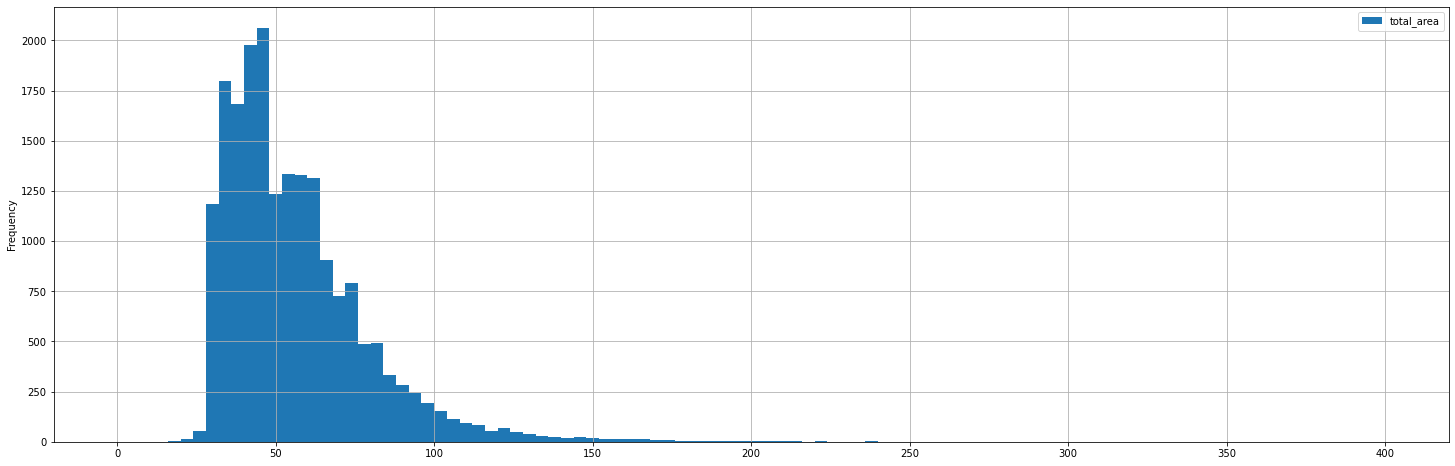

In [86]:
# Изучим площадь
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (25,8), range = (0,400))
df['total_area'].describe()# распределение данных нормальное, есть выбросы но они не сильно влияют на данные

count    1.934300e+04
mean     5.458433e+06
std      4.197711e+06
min      4.700000e+05
25%      3.400000e+06
50%      4.500000e+06
75%      6.300000e+06
max      1.300000e+08
Name: last_price, dtype: float64

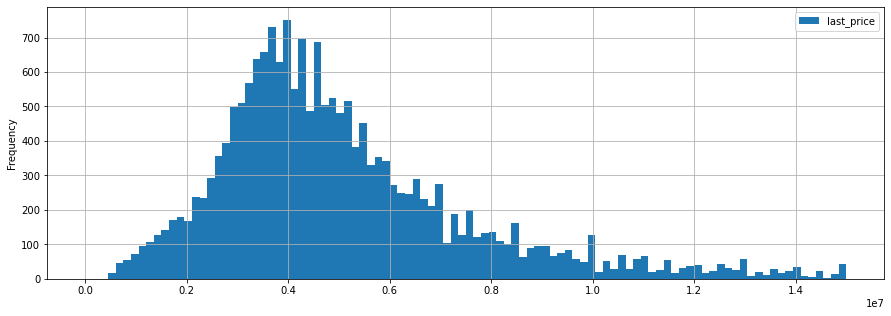

In [87]:
#Изучим цену
#df['last_price'] = df['last_price']/1000000
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (15,5))
df['last_price'].describe() #все ок

count    19343.000000
mean         2.018249
std          0.942581
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

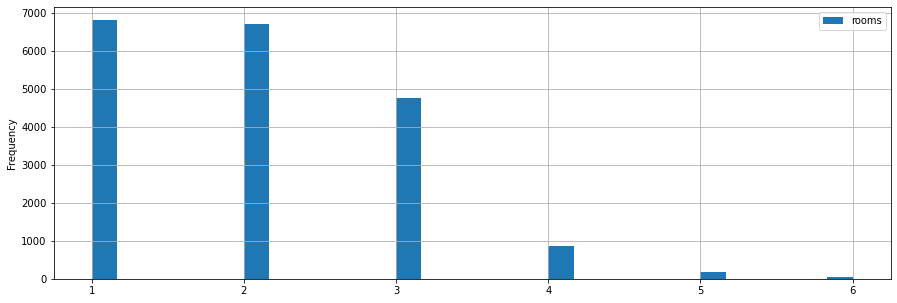

In [88]:
 # изучим число комнат
df.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (15,5))
df['rooms'].describe()

count    19343.000000
mean        98.491360
std        126.296809
min          2.200000
25%          2.600000
50%          2.800000
75%        265.000000
max        265.000000
Name: ceiling_height, dtype: float64

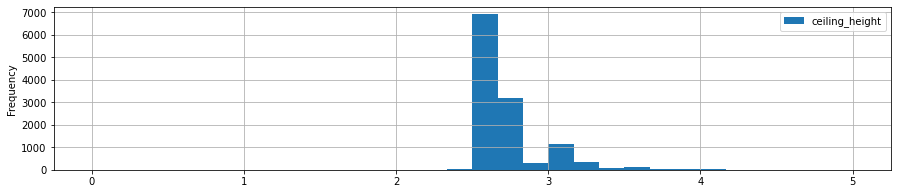

In [89]:
# Изучим потолки
df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (0,5), grid=True, figsize = (15,3))
df['ceiling_height'].describe()

 ***Вывод 1.*** Общая площадь в нашей выборке колеблется от 17 до 342 м2, среднее значение 50, а медиана 55 м2. Распределение гауссовское.

Цены на недвижимость имеют среднее значение в 5,45 млн руб., медиана 4,5 млн руб. Распределение гауссовское.

Количество комнат колеблется от 1 до 6. Больше всего однокомнатных квартир. Но и двушки тоже в приоритете продажи

Высота потолков- медиана 2,65 м.



### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Предположение: дата снятия объявления может не считаться датой продажи

In [90]:
df['days_exposition'].describe().to_frame()

,days_exposition
count,16791.000000
mean,180.929665
std,217.926153
min,1.000000
25%,44.000000
50%,99.000000
75%,232.000000
max,1580.000000


Среднее время продаж 180 дней - много, медианное 95 - 3 месяца  нормальный срок для продажи квартиры, минимальное время - 1 день, это, наверное, ошибочное размещение, а максимальное значение - 1580.
Построим гистограмму

<AxesSubplot:>

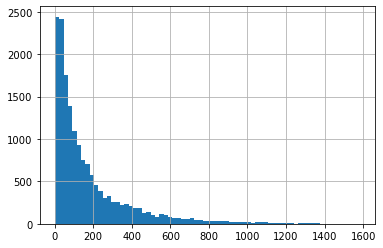

In [91]:
df['days_exposition'].hist(bins=70)

<AxesSubplot:>

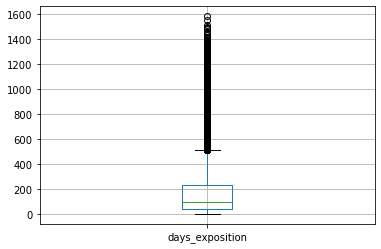

In [92]:
df.boxplot(column='days_exposition') #смотрим выбивающиеся значения

Ограничим время размещения 500 днями, чтоб убрать выбросы.

<AxesSubplot:>

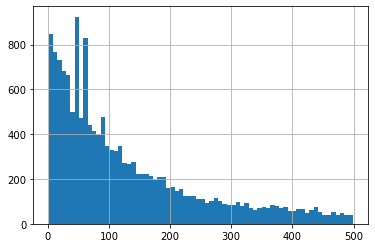

In [93]:
df.query('days_exposition<500')['days_exposition'].hist(bins=70)

На гистограмме видны аномально высокие продажи в районе до 100 дней, ограничим время размещения до 100 дней и ещё раз построим гистограмму:

<AxesSubplot:>

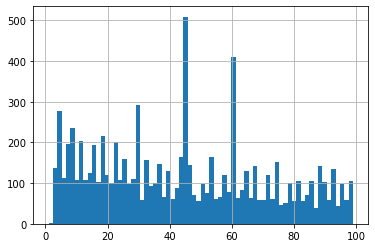

In [94]:
df.query('days_exposition<100')['days_exposition'].hist(bins=70)

Рассмотрим от 25 до 65 дней

<AxesSubplot:>

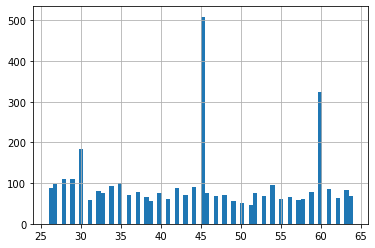

In [95]:
df.query('25<days_exposition<65')['days_exposition'].hist(bins=70)

Аномальный рост продаж на 45 и 60 день размещения. Согласно действующим правилам размещения объявлений на Яндекс.Недвижимость в Санкт-Петербурге: срок размещения бесплатных объявлений 90 дней, период размещения платных 30 дней, этим можно объяснить рост продаж в период кратный 30 (это снятие объявлений с размещения), но это не объясняет пик продаж на 45 день. Могу лишь предположить, что возможно необходимо обновлять объявление каждые 15 дней и если это не происходит, объявление автоматически закрывается.
Посмотрим на гистограмму, исключив значения кратные 15.

<AxesSubplot:>

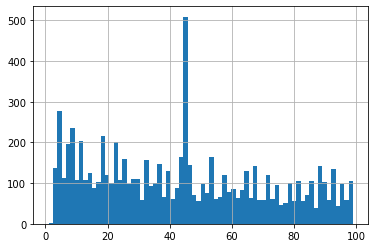

In [96]:
df.query('days_exposition<100 & days_exposition not in (15, 30, 45, 60, 75, 90)')['days_exposition'].hist(bins=70)

In [97]:
df.query('days_exposition<=180 & days_exposition not in (15,30,45,60,75,90,105,120,135,150,165,180)')['days_exposition'].describe()

count    10541.000000
mean        68.133194
std         48.479620
min          1.000000
25%         27.000000
50%         57.000000
75%        103.000000
max        179.000000
Name: days_exposition, dtype: float64

***Вывод:Среднее значение составляет около 2 месяцев, значит большинство квартир продаются примерно в эти сроки***

обнаружили выбивающиеся значения на днях размещения кратных 15, сделали предположения о том, что в эти дни проходит автоматическое закрытие объявления, если нет подтверждения продления

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года


In [98]:
df.head()



,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,last_price,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_per_meter,total_living_area_ratio,kitchen_area_ratio,floor_variant
1,поселок Шушары,1,40.40,18.60,11.00,265.0,2,1,11.0,3350000,...,12817.0,18603.0,0.0,NaN,0.0,NaN,82920,0.460396,0.272277,первый
2,Санкт-Петербург,2,56.00,34.30,8.30,265.0,0,4,5.0,5196000,...,21741.0,13933.0,1.0,90.0,2.0,574.0,92785,0.612500,0.148214,другой
5,городской поселок Янино-1,1,30.40,14.40,9.10,265.0,0,5,12.0,2890000,...,NaN,NaN,NaN,NaN,NaN,NaN,95065,0.473684,0.299342,другой
8,поселок Мурино,1,33.16,15.43,8.81,265.0,0,26,27.0,2900000,...,NaN,NaN,NaN,NaN,NaN,NaN,87454,0.465320,0.265682,другой
9,Санкт-Петербург,3,61.00,43.60,6.50,2.5,2,7,9.0,5400000,...,50898.0,15008.0,0.0,NaN,0.0,NaN,88524,0.714754,0.106557,другой


In [99]:
#считаем коэффициент корреляции
corr = df[['price_per_meter',\
           'total_area',\
           'week_day',\
           'last_price',\
           'cityCenters_nearest',\
           'rooms']].corr()
corr.style.background_gradient(cmap='coolwarm')

,price_per_meter,total_area,week_day,last_price,cityCenters_nearest,rooms
price_per_meter,1.000000,0.154046,-0.006697,0.718464,-0.368615,-0.064535
total_area,0.154046,1.000000,-0.009804,0.710854,-0.204551,0.794584
week_day,-0.006697,-0.009804,1.000000,-0.008436,0.011543,0.000047
last_price,0.718464,0.710854,-0.008436,1.000000,-0.300021,0.431124
cityCenters_nearest,-0.368615,-0.204551,0.011543,-0.300021,1.000000,-0.144054
rooms,-0.064535,0.794584,0.000047,0.431124,-0.144054,1.000000


Чем ближе коэффициент корреляции Пирсона к крайним значениям: 1 или -1, тем сильнее взаимозависимость. Если значение близко к нулю, значит связь слабая, либо отсутствует вовсе. По таблице пока сильных взаимосвязей не наблюдаем.
На стоимость квадратного метра квартиры сильнее всего влияет итоговая цена и количество комнат. Ну и отрицательная корреляция между стоимостью за квадрат и центром тоже имеет место быть - но эти выводы не имеют для нас никакого значения))

***Изучим зависимость цены квадратного метра от общей площади квартиры***

In [100]:
#pivot_table_total_area = df.pivot_table(index = 'total_area', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
#pivot_table_total_area.columns = ['mean', 'count', 'median']
#pivot_table_total_area.plot(y = 'median', style = 'o',alpha=0.3)

#pivot_table_total_area.sort_values('median', ascending = False)

#df['total_area'].corr(df['price_per_meter'])

<AxesSubplot:xlabel='total_area'>

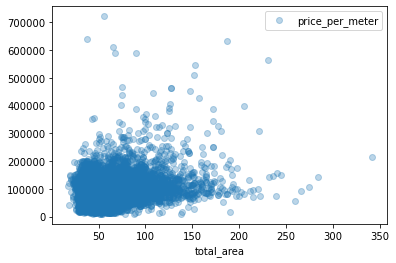

In [101]:
df.plot(y='price_per_meter', x = 'total_area', style = 'o',alpha=0.3)

In [102]:
df['total_area'].corr(df['price_per_meter'])

0.15404577657162943

***На графике вижно, что зависимость площади кв от стоимости кв метра небольшая -коэфф корреляции 0,15***

***Изучим зависимость цены квадратного метра от числа комнат***


In [103]:
#pivot_table_rooms = df.pivot_table(index = 'rooms', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
#pivot_table_rooms.columns = ['mean', 'count', 'median']
#pivot_table_rooms.plot(y = 'median', style = 'o',alpha=0.3 )

#pivot_table_rooms.sort_values('median', ascending = False)

#df['rooms'].corr(df['price_per_meter'])

<AxesSubplot:xlabel='rooms'>

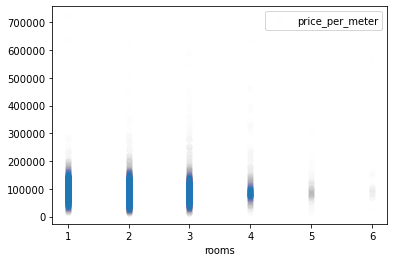

In [104]:
df.plot(y = 'price_per_meter', x='rooms', style = 'o',alpha=0.002 )

In [105]:
df['rooms'].corr(df['price_per_meter'])

-0.06453466612788498

***Изучим зависимость цены квадратного метра от этажа (первого или последнего)***


In [106]:
#pivot_table_floor_variant = df.pivot_table(index = 'floor_variant', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
#pivot_table_floor_variant.columns = ['mean', 'count', 'median']
#pivot_table_floor_variant.plot(y = 'median', style = 'o')

#pivot_table_floor_variant.sort_values('median', ascending = False)

#df['floor_variant'].corr(df['price_per_meter'])

<AxesSubplot:xlabel='floor_variant', ylabel='price_per_meter'>

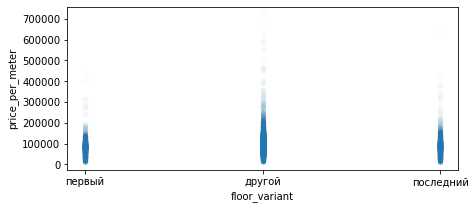

In [107]:
df.plot(x = 'floor_variant', y = 'price_per_meter', kind = 'scatter', alpha = 0.02, figsize = (7, 3))

<AxesSubplot:xlabel='floor_variant'>

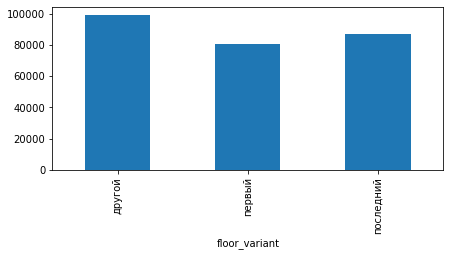

In [108]:

df.groupby('floor_variant')['price_per_meter'].mean()\
    .plot(x = 'floor_variant', y = 'mean', kind = 'bar', figsize = (7, 3))

***Можно предположить, что цена за кв метр на первом этаже самая низкая. А на любом, кроме первого и последенего, будет выше. Это естественно - никто не хочет жить с окнами с решетками на первом этаже))***

***Изучим зависимость цены квадратного метра от удалённости от центра***

-0.3686153572269009

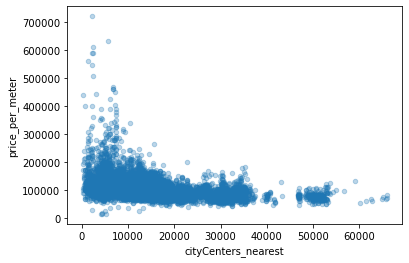

In [109]:
df.plot(kind = 'scatter', y = 'price_per_meter', x = 'cityCenters_nearest', alpha = 0.3)

df['cityCenters_nearest'].corr(df['price_per_meter'])

***Прослеживается явная зависимость удаленности от центра и ценой за кв метр - это тоже понятно, все стараются жиить поближе к центру и экономить время до работы***

***Изучим зависимость цены квадратного метра от даты размещения: дня недели***

,mean,count,median
week_day,,,
2,95732.229538,3250,94326.0
1,94693.947476,3427,93877.0
0,95498.961139,2985,93750.0
3,95576.768112,3506,93539.5
6,94419.478423,1344,93395.0
4,95452.639425,3267,93155.0
5,93616.818414,1564,91681.5


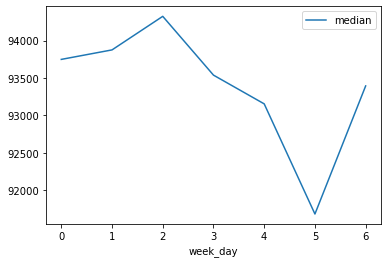

In [110]:
pivot_table_week_day = df.pivot_table(index = 'week_day', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_week_day.columns = ['mean', 'count', 'median']
pivot_table_week_day.plot(y = 'median')

pivot_table_week_day.sort_values('median', ascending = False)

***Видим, что чем ближе к среде выставлены объявления  - тем в среднем выше стоимость кв метра. По субботам стоимость самая низкая стоимость***

***Полагаю, что стоимость выставленной на продажу недвижимости зависит от общей активности людей, так как именно в рабочие дни мы видим более высокие цены, особенно в разгар раб недели -в среду***

,mean,count,median
month,,,
1,96204.965035,1144,94939.0
4,96177.798188,1987,94907.0
8,96274.890440,1433,94710.0
9,96745.660512,1679,94504.0
2,94320.270080,2129,93959.0
12,95413.580725,1214,93803.5
3,95463.645299,2106,93648.0
11,94213.957852,1993,93571.0
7,95004.140118,1356,93372.0


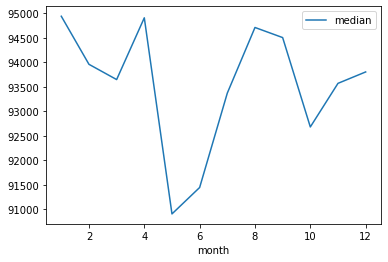

In [111]:
pivot_table_month = df.pivot_table(index = 'month', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month.columns = ['mean', 'count', 'median']
pivot_table_month.plot(y = 'median')

pivot_table_month.sort_values('median', ascending = False)

***Cамая высокая стоимость  кв метра в апреле и августе, самая низкая стоимость в мае и июне. На рынке недвижимости, как и во многих других сферах присутствует сезонность - в начале лета мы видим наименьшее предложение как по количеству, так и по стоимости недвижимости. Вероятно, это связано с отпусками и в целом летом людям не хочется заморачиваться с продажами***

,mean,count,median
year,,,
2019,102179.006703,2387,101904.0
2014,102415.750000,92,100107.5
2018,95137.721886,6767,95000.0
2017,93361.517342,6833,91250.0
2015,95482.266739,926,90729.0
2016,93022.403336,2338,89593.0


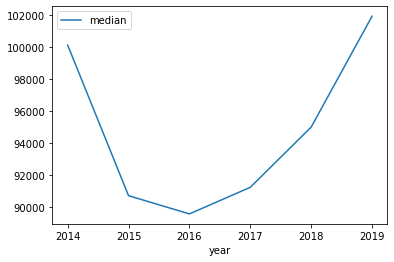

In [112]:
pivot_table_year = df.pivot_table(index = 'year', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year.columns = ['mean', 'count', 'median']
pivot_table_year.plot(y = 'median')

pivot_table_year.sort_values('median', ascending = False)

 ***Видим, что с 2014 до 2016 года цена падала, но далее начала увеличиваться. Возможно, это связано с кризисом и политическими событиями в стране , в часности с Крымом(2014-2015)***. 

***Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья***

<AxesSubplot:xlabel='locality_name'>

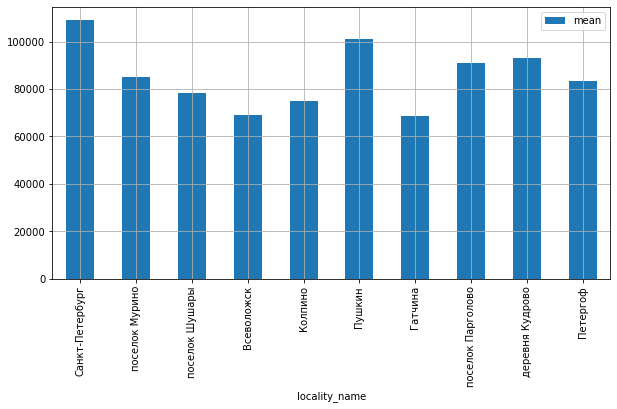

In [113]:
locality_pivot_table = df.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10).reset_index()
locality_pivot_table

locality_pivot_table.plot(kind='bar', x='locality_name', y='mean', grid=True, figsize=(10,5))


In [114]:
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,locality_name,count,mean
0,Санкт-Петербург,12732,109056.831762


In [115]:
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,locality_name,count,mean
6,Гатчина,286,68435.104895


In [116]:
# Изначальные данные
print('Изначальные данные')
display(df.head())
# Тут строется сводная таблица 
locality_pivot_table = df.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc=['count', 'mean'])
print('Построили сводную')
display(locality_pivot_table)
# Здесь переименовываются названия столбцов
locality_pivot_table.columns = ['count', 'mean']
print('Переименовали столбцы, чтобы не было мульти индекса у столбцов')
display(locality_pivot_table)
# Тут сортируются значения
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False)
print('Отсортировали по count в порядке убывания')
display(locality_pivot_table)
# Тут берется топ10
locality_pivot_table = locality_pivot_table.head(10)
print('Взяли топ 10')
display(locality_pivot_table)
# Тут сбрасываются индексы
locality_pivot_table = locality_pivot_table.reset_index()
print('Перезаписали индексы')
display(locality_pivot_table)

Изначальные данные


,locality_name,rooms,total_area,living_area,kitchen_area,ceiling_height,balcony,floor,floors_total,last_price,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,price_per_meter,total_living_area_ratio,kitchen_area_ratio,floor_variant
1,поселок Шушары,1,40.40,18.60,11.00,265.0,2,1,11.0,3350000,...,12817.0,18603.0,0.0,NaN,0.0,NaN,82920,0.460396,0.272277,первый
2,Санкт-Петербург,2,56.00,34.30,8.30,265.0,0,4,5.0,5196000,...,21741.0,13933.0,1.0,90.0,2.0,574.0,92785,0.612500,0.148214,другой
5,городской поселок Янино-1,1,30.40,14.40,9.10,265.0,0,5,12.0,2890000,...,NaN,NaN,NaN,NaN,NaN,NaN,95065,0.473684,0.299342,другой
8,поселок Мурино,1,33.16,15.43,8.81,265.0,0,26,27.0,2900000,...,NaN,NaN,NaN,NaN,NaN,NaN,87454,0.465320,0.265682,другой
9,Санкт-Петербург,3,61.00,43.60,6.50,2.5,2,7,9.0,5400000,...,50898.0,15008.0,0.0,NaN,0.0,NaN,88524,0.714754,0.106557,другой


Построили сводную


,count,mean
,price_per_meter,price_per_meter
locality_name,,
Бокситогорск,10,16910.400000
Волосово,35,40144.171429
Волхов,91,35120.406593
Всеволожск,344,68910.598837
Выборг,176,57654.125000
...,...,...
село Путилово,2,39921.500000
село Рождествено,2,34553.500000


Переименовали столбцы, чтобы не было мульти индекса у столбцов


,count,mean
locality_name,,
Бокситогорск,10,16910.400000
Волосово,35,40144.171429
Волхов,91,35120.406593
Всеволожск,344,68910.598837
Выборг,176,57654.125000
...,...,...
село Путилово,2,39921.500000
село Рождествено,2,34553.500000
село Русско-Высоцкое,8,54991.000000


Отсортировали по count в порядке убывания


,count,mean
locality_name,,
Санкт-Петербург,12732,109056.831762
поселок Мурино,411,85262.350365
поселок Шушары,381,78161.275591
Всеволожск,344,68910.598837
Колпино,315,75072.987302
...,...,...
деревня Ялгино,1,17659.000000
деревня Щеглово,1,56798.000000
деревня Шпаньково,1,27352.000000


Взяли топ 10


,count,mean
locality_name,,
Санкт-Петербург,12732,109056.831762
поселок Мурино,411,85262.350365
поселок Шушары,381,78161.275591
Всеволожск,344,68910.598837
Колпино,315,75072.987302
Пушкин,306,100918.797386
Гатчина,286,68435.104895
поселок Парголово,267,90829.288390
деревня Кудрово,203,92918.876847


Перезаписали индексы


,locality_name,count,mean
0,Санкт-Петербург,12732,109056.831762
1,поселок Мурино,411,85262.350365
2,поселок Шушары,381,78161.275591
3,Всеволожск,344,68910.598837
4,Колпино,315,75072.987302
5,Пушкин,306,100918.797386
6,Гатчина,286,68435.104895
7,поселок Парголово,267,90829.288390
8,деревня Кудрово,203,92918.876847
9,Петергоф,184,83455.989130


***Самое дорогое жилье - В санкт-Петербурге
Самое дешевое - в Гатчине***

### Как цена зависит от удалённости от центра Санкт-Петербурга

Изучим предложения квартир. Для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Задача — выяснить, какая область входит в центр. У нас есть столбец с расстоянием до центра в км, посчитаем среднюю цену для каждого километра. Построим график: он будет показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

,price_per_meter
cityCenters_nearest_km,
0,142409.395833
1,137564.779874
2,137096.950980
3,118312.542553
4,125519.619125
5,131509.972656
6,135432.862928
7,132766.421222
8,115516.756705


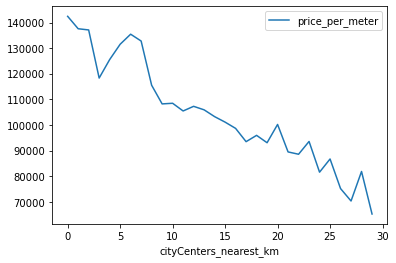

In [117]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].fillna(10000)
df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].astype('int')
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=10000').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_meter', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km

***По графику можно судить, что после 7км график сильно меняется - это и есть граница центральной части.***

### Исследовательский анализ: изучаем влияние факторов на стоимость квартиры в центре Санкт-Петербурга

In [118]:
#выделим квартиры в центре, беря за радиус 7 км
center_spb_df = df.query('cityCenters_nearest_km <= 7 and locality_name == "Санкт-Петербург"')

***Зависимость стоимости квадратного метра от количества комнат***

-0.15090275964321345

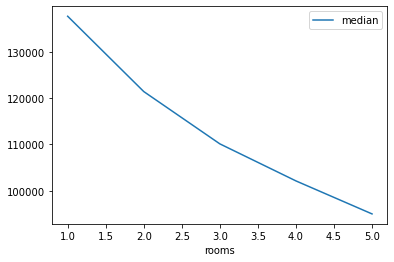

In [119]:
center_spb_rooms = center_spb_df.pivot_table(index = 'rooms', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median')

center_spb_rooms.query('count > 50').sort_values('median', ascending = False)

center_spb_df['rooms'].corr(center_spb_df['price_per_meter'])


***Вывод - Коэффициент корреляции 0,15 - немного, соответственно можно судить о  зависимости стоимости квадратного метра от количества комнат (однушки-всегда дороже на рынке)
Это коррелирует со все выборкой - там тоже однушки- самые дорогие, т.е цена за квадрат тем выше, чем меньше комнат***

***Зависимость стоимости квадратного метра от этажа***

,mean,count,median
floor_variant,,,
первый,114809.800000,310,105249.5
последний,124562.324324,444,111733.0


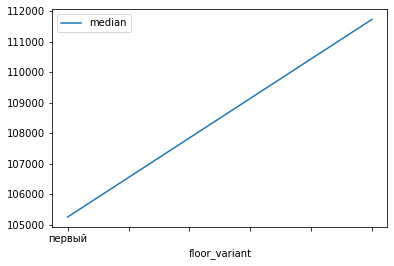

In [120]:
center_spb_floor_variant = center_spb_df.query('floor_variant != "другой"').pivot_table(index = 'floor_variant', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_floor_variant.columns = ['mean', 'count', 'median']
center_spb_floor_variant.plot(y = 'median')
center_spb_floor_variant


***Вывод -Квартиры на первом этаже в среднем дешевле, чем на последнем. Собственно, также как и во всей выборке)) Никто не любит жить на первом этаже -поэтому владельцам квартир на первом этаже приходится снижать цену за кв метр***

***Зависимость стоимости квадратного метра от удаленности от центра***

0.006805342168213659

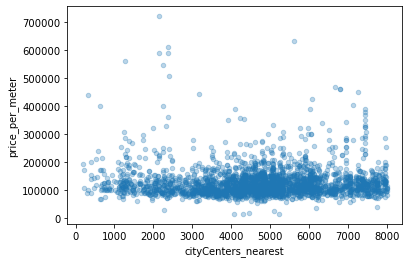

In [121]:
center_spb_df.plot(kind = 'scatter', y = 'price_per_meter', x = 'cityCenters_nearest', alpha = 0.3)

center_spb_df['cityCenters_nearest'].corr(center_spb_df['price_per_meter'])

***Вывод - Коэффициент корреляции близок к 0, соответственно можно судить об отсутствии зависимости стоимости квадратного метра от удаленности от центра. Но это и есть центр)) все 7 км от центра -это центр)) 
Но во всей выборке это не так, там прослеживается зависимость от удаленности от центра -чем дальше,тем дешевле***

***Зависимость стоимости квадратного метра от дня недели размещения объявления***

,mean,count,median
week_day,,,
5,134277.136126,191,123636
6,132039.820896,134,120324
4,131942.506977,430,119630
0,130040.323077,390,118577
2,128146.398148,432,116553
3,130748.139098,532,116226
1,125276.161731,439,115000


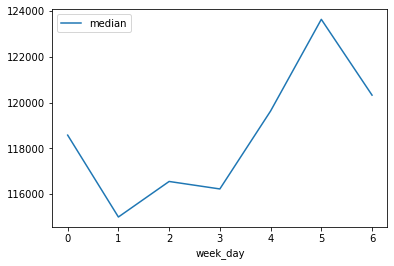

In [122]:
center_spb_week_day = center_spb_df.pivot_table(index = 'week_day', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_week_day.columns = ['mean', 'count', 'median']
center_spb_week_day.plot(y = 'median')

center_spb_week_day.sort_values('median', ascending = False)

***Вывод- Cитуация диаметрально отличается от всей выборки(!!), минимальные средние цены во вторник и четверг, самые высокие - в субботу! Во всей выборке мы имели самые высокие цены в среду***

***Зависимость стоимости квадратного метра от месяца размещения объявления***

,mean,count,median
month,,,
3,135943.966667,270,128933.5
1,131767.466667,135,120937.0
9,131748.865854,246,120662.5
4,130946.971074,242,119376.0
8,132988.446701,197,118666.0
12,127866.590361,166,118488.5
10,128587.000000,224,116920.5
5,127112.849673,153,115296.0
6,134243.555556,216,114816.5


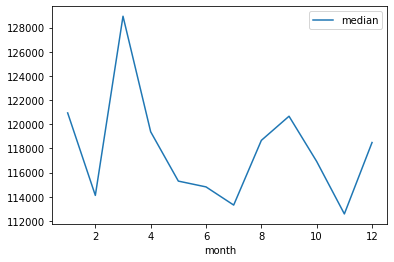

In [123]:
center_spb_month = center_spb_df.pivot_table(index = 'month', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_month.columns = ['mean', 'count', 'median']
center_spb_month.plot(y = 'median')

center_spb_month.sort_values('median', ascending = False)

***Вывод - Ситуация СХОЖАЯ с общей выборкой - самая высокая стоимость метра в марте,апреле и августе. Самая низкая стоимость в  июне***

***Зависимость стоимости квадратного метра от года размещения объявления***

,mean,count,median
year,,,
2019,142066.406716,268,131749
2018,127425.188067,771,117579
2017,128387.164294,913,116291
2014,142751.000000,11,115957
2015,126001.452830,212,113312
2016,131061.916890,373,113188


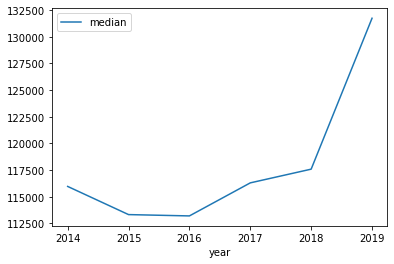

In [124]:
center_spb_year = center_spb_df.pivot_table(index = 'year', values = 'price_per_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_year.columns = ['mean', 'count', 'median']
center_spb_year.plot(y = 'median')

center_spb_year.sort_values('median', ascending = False)

***Вывод - Ситуация СХОЖАЯ с общей выборкой - видим спад цены в 2014-2016 годах (может обусловленый политической ситуацией). Затем плавный рост - выход из кризиса. Все-таки политические события влияют на стоимость жилья***

# Общий вывод

 - 1) Мы обработали полученный архив данных - обработали пропущенные значения там, где это необходимо, заменили типы данных на необходимые для удобной работы. 
 - 2) Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир.
 - 3) Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. 
 - 4) Изучая время продажи квартир мы выявили, что большое количество объявлений было автоматически снято с Яндекс Недвижимость и дату из снятия нельзя считать датой продажи квартиры, поэтому, изучая средние сроки продажи квартир - данные значения не учитывались.  
 - 5) Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат - квартиры с 1-2 комнатами имеют самый дорогой кв м (ох уж эти дорогие однушки), этаж квартиры на первом самый дешевый кв метр, близость к центру - это тоже вполне объяснимый факт. 
 - 6) Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь.
 - 7) Нужно учитывать, что в 2014-2016 годах стоимость квартир в среднем по рынку была ниже. В данном случае имело место постоянное удорожание стоимости, начиная с 2015 года по текущий момент. 
 - 8) Самая высокая стоимость кв м - в Санкт-Петербурге (109056 руб.), самая дешевая - в Гатчине (68435 руб). Это из 10 самых крупных населенных пунктов.
 - 9) Провели Исследовательский анализ влияния факторов на стоимость квартиры в центре Санкт-Петербурга. Там прослеживаются все зависимости, что и для всех населенных пунктов. Кроме Зависимости стоимости квадратного метра от дня недели размещения объявления -  в питере по субботам люди выставляют самые дорогие варианты

Также важно учитывать, что, рассматривая среднюю стоимость квартир в 2014-2019 годах, мы не делали сегментацию рынка, а лишь смотрели средние показатели по рынку в целом. Т.е. возможно, что цены на аналогичные квартиры в разных годах вели себя абсолютно по-разному. Т.е. например в то время, когда средняя стоимость метра по рынку в 2016-2017 годах была наиболее низкой, какие-то аналогичные прошлым годам квартиры могли и не падать в цене, а наоборот дорожать! Именно об этом нам и говорят данные, полученные при изучении единственного сегмента квартир - находящихся в радиусе 3 км в центре СПБ.